<a href="https://colab.research.google.com/github/Omarrhussain/ML_Project/blob/main/ML_Project_MS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
df = pd.read_csv('/content/SongPopularity_Milestone2.csv')
y = df['PopularityLevel']
df.head(10)

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.1180,-7.124,0.0367,144.705,0.5640,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.2400,-6.254,0.0383,66.024,0.5840,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.5230,-7.913,0.0357,141.912,0.2720,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.1030,-16.131,0.0497,76.642,0.3310,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.2470,-10.669,0.0545,143.595,0.3850,7,0,4
5,Always,Cross Road,10/18/1994,['Bon Jovi'],"['glam metal', 'rock']",1995,17,353026,https://open.spotify.com/track/2RChe0r2cMoyOvu...,https://i.scdn.co/image/ab67616d00001e025f66fb...,...,0.659,0.000000,0.0778,-5.558,0.0312,140.795,0.3270,4,1,4
6,I Saw Red,Cherry Pie (Expanded Edition),5/1/1990,['Warrant'],"['glam metal', 'album rock', 'hard rock']",1991,96,226920,https://open.spotify.com/track/5Kz1hj2NNSsgf0Y...,https://i.scdn.co/image/ab67616d00001e02a68640...,...,0.677,0.000000,0.3810,-6.139,0.0271,84.879,0.4370,4,0,4
7,Hands Clean,Under Rug Swept,2/25/2002,['Alanis Morissette'],"['canadian singer-songwriter', 'neo mellow', '...",2002,95,269400,https://open.spotify.com/track/2LVxvGhl2U5p2ql...,https://i.scdn.co/image/ab67616d00001e02d78336...,...,0.820,0.000003,0.5040,-5.428,0.0299,99.952,0.5200,7,1,4
8,Here (In Your Arms),Zombies! Aliens! Vampires! Dinosaurs!,8/8/2006,['Hellogoodbye'],"['pop punk', 'neon pop punk']",2007,81,240546,https://open.spotify.com/track/1GV98LUEVk1U3LW...,https://i.scdn.co/image/ab67616d00001e02c361d9...,...,0.607,0.001730,0.2720,-6.804,0.0359,126.045,0.7740,5,1,4
9,One More Try - Remastered,Faith,10/30/1987,['George Michael'],['new wave pop'],1988,11,350666,https://open.spotify.com/track/5932kbyNt445gDT...,https://i.scdn.co/image/ab67616d00001e02b7a9a6...,...,0.291,0.000038,0.1100,-12.544,0.0283,119.005,0.0823,5,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  PopularityLevel      6191 non-null   object 
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [ ]:
# Split the 'Artist(s)' column into separate artists
df['Artist Names'] = df['Artist Names'].apply(lambda x: [artist.strip() for artist in x.replace('[','').replace(']','').split(',')])

# Get unique artists
unique_artists = set()
for artists in df['Artist Names']:
    unique_artists.update(artists)

for artist in unique_artists:
  df[artist] = df['Artist Names'].apply(lambda x: 1 if artist in x else 0)
  # Check if count of 0s is greater than count of 1s
  if df[artist].value_counts().get(0, 0) > 6150:
        df.drop(artist, axis=1, inplace=True)
# Drop the original 'Artist(s)' column
df.drop(columns=['Artist Names'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Song                   6191 non-null   object 
 1   Album                  6191 non-null   object 
 2   Album Release Date     6191 non-null   object 
 3   Artist(s) Genres       6191 non-null   object 
 4   Hot100 Ranking Year    6191 non-null   int64  
 5   Hot100 Rank            6191 non-null   int64  
 6   Song Length(ms)        6191 non-null   int64  
 7   Spotify Link           6191 non-null   object 
 8   Song Image             6191 non-null   object 
 9   Spotify URI            6191 non-null   object 
 10  PopularityLevel        6191 non-null   object 
 11  Acousticness           6191 non-null   float64
 12  Danceability           6191 non-null   float64
 13  Energy                 6191 non-null   float64
 14  Instrumentalness       6191 non-null   float64
 15  Live

In [ ]:
# Split the 'Artist(s)' column into separate artists
df['Artist(s) Genres'] = df['Artist(s) Genres'].apply(lambda x: [artist.strip() for artist in x.replace('[','').replace(']','').split(',')])

# Get unique artists
unique_artists = set()
for artists in df['Artist(s) Genres']:
    unique_artists.update(artists)

for artist in unique_artists:
  df[artist] = df['Artist(s) Genres'].apply(lambda x: 1 if artist in x else 0)
  # Check if count of 0s is greater than count of 1s
  if df[artist].value_counts().get(0, 0) > 5990:
        df.drop(artist, axis=1, inplace=True)
# Drop the original 'Artist(s)' column
df.drop(columns=['Artist(s) Genres'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Song                    6191 non-null   object 
 1   Album                   6191 non-null   object 
 2   Album Release Date      6191 non-null   object 
 3   Hot100 Ranking Year     6191 non-null   int64  
 4   Hot100 Rank             6191 non-null   int64  
 5   Song Length(ms)         6191 non-null   int64  
 6   Spotify Link            6191 non-null   object 
 7   Song Image              6191 non-null   object 
 8   Spotify URI             6191 non-null   object 
 9   PopularityLevel         6191 non-null   object 
 10  Acousticness            6191 non-null   float64
 11  Danceability            6191 non-null   float64
 12  Energy                  6191 non-null   float64
 13  Instrumentalness        6191 non-null   float64
 14  Liveness                6191 non-null   

In [ ]:
date = pd.to_datetime(df['Album Release Date'], format='mixed')
year = date.dt.year
month = date.dt.month
day = date.dt.day

df['year'] = year
df['month'] = month
df['day'] = day

df.drop('Album Release Date', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Song                    6191 non-null   object 
 1   Album                   6191 non-null   object 
 2   Hot100 Ranking Year     6191 non-null   int64  
 3   Hot100 Rank             6191 non-null   int64  
 4   Song Length(ms)         6191 non-null   int64  
 5   Spotify Link            6191 non-null   object 
 6   Song Image              6191 non-null   object 
 7   Spotify URI             6191 non-null   object 
 8   PopularityLevel         6191 non-null   object 
 9   Acousticness            6191 non-null   float64
 10  Danceability            6191 non-null   float64
 11  Energy                  6191 non-null   float64
 12  Instrumentalness        6191 non-null   float64
 13  Liveness                6191 non-null   float64
 14  Loudness                6191 non-null   

In [ ]:
print(df.isnull().sum())

Song                   0
Album                  0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
                      ..
'dance pop'            0
'gangster rap'         0
year                   0
month                  0
day                    0
Length: 63, dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Loop through each column in the DataFrame object
for col in df.columns:
    # Check if the column is categorical
    if df[col].dtype == 'object':
        # Count the number of unique categories in the column
        num_categories = len(df[col].unique())
        print(f"{col} has {num_categories} categories")

Song has 5694 categories
Album has 4520 categories
Spotify Link has 5918 categories
Song Image has 4666 categories
Spotify URI has 5918 categories
PopularityLevel has 3 categories


In [ ]:
#label encoding
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Apply label encoding to a specific categorical column
df.drop('Song', axis=1, inplace=True)

In [ ]:
# Apply label encoding to a specific categorical column
df['album'] = le.fit_transform(df['Album'])
df.drop('Album', axis=1, inplace=True)

df['spotify Link'] = le.fit_transform(df['Spotify Link'])
df.drop('Spotify Link', axis=1, inplace=True)

df['song Image'] = le.fit_transform(df['Song Image'])
df.drop('Song Image', axis=1, inplace=True)

df['spotify URI'] = le.fit_transform(df['Spotify URI'])
df.drop('Spotify URI', axis=1, inplace=True)
df.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),PopularityLevel,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,...,'bubblegum pop','dance pop','gangster rap',year,month,day,album,spotify Link,song Image,spotify URI
0,2000,44,229826,Average,0.0200,0.478,0.736,0.000096,0.118,-7.124,...,0,0,0,2001,1,30,1744,53,1665,53
1,1999,43,290600,Average,0.2330,0.588,0.522,0.000000,0.240,-6.254,...,0,0,0,1998,8,31,4196,928,2353,928
2,1979,86,197453,Average,0.4760,0.313,0.600,0.000026,0.523,-7.913,...,1,0,0,1979,1,1,3240,2351,3786,2351
3,1954,20,169066,Average,0.9730,0.503,0.059,0.000000,0.103,-16.131,...,0,0,0,1945,1,1,1444,1503,4402,1503
4,2006,50,251013,Not Popular,0.0149,0.843,0.348,0.001280,0.247,-10.669,...,0,0,0,2011,8,16,1095,1609,3199,1609


In [ ]:
import pickle
with open('Label_Encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
# Load LabelEncoder object
with open('Label_Encoder.pkl', 'rb') as f:
    le = pickle.load(f)

In [ ]:
all_columns = df.columns.tolist()
features = [col for col in all_columns if col != 'PopularityLevel']
X = pd.DataFrame(MinMaxScaler().fit_transform(df[features]), columns=features)

In [ ]:
# Save the MinMaxScaler object
with open('MinMax_Scaler.pkl', 'wb') as f:
    pickle.dump(X, f)
# Load MinMaxScaler object
with open('MinMax_Scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

Unique values in 'PopularityLevel': ['Average' 'Not Popular' 'Popular']
Columns with outliers:
Index(['', ''Drake'', ''The Karaoke Channel'', ''adult standards'',
       ''album rock'', ''atl hip hop'', ''bubblegum pop'', ''classic rock'',
       ''classic soul'', ''contemporary country'', ''contemporary r&b'',
       ''country rock'', ''country'', ''dance pop'', ''disco'',
       ''easy listening'', ''folk rock'', ''gangster rap'', ''hard rock'',
       ''heartland rock'', ''hip hop'', ''hip pop'', ''mellow gold'',
       ''motown'', ''new wave pop'', ''pop rap'', ''pop'', ''quiet storm'',
       ''r&b'', ''rap'', ''rock'', ''rock-and-roll'', ''rockabilly'',
       ''singer-songwriter'', ''soft rock'', ''soul'', ''southern hip hop'',
       ''trap'', ''urban contemporary'', 'Acousticness', 'Danceability',
       'Energy', 'Hot100 Ranking Year', 'Instrumentalness', 'Liveness',
       'Loudness', 'Song Length(ms)', 'Speechiness', 'Tempo', 'Time Signature',
       'Valence', 'day', 'year

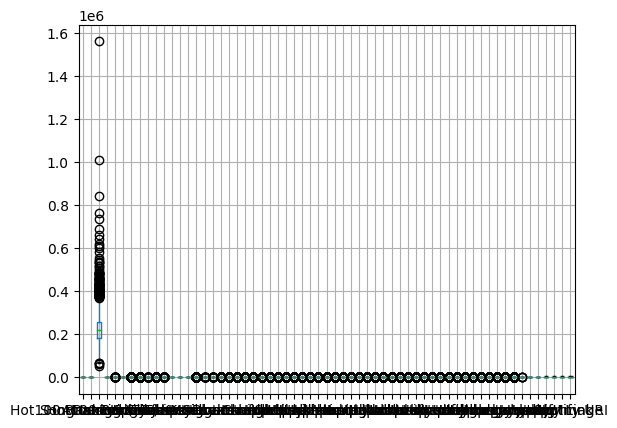

In [ ]:
# Visualize the data using box plots
df.boxplot()

# Calculate summary statistics
summary_stats = df.describe()

categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.columns.difference(categorical_cols)
df_numeric = df[numeric_cols]
# Calculate Z-scores for each column
z_scores = (df_numeric - df_numeric.mean()) / df_numeric.std()
# Print the unique values in each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")

# Consider encoding categorical data or using alternative methods for outlier detection

# Calculate the IQR for each column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using Z-score or IQR methods
zscore_threshold = 2  # Adjust the threshold as needed
iqr_multiplier = 1.5  # Adjust the multiplier as needed

# Identify outliers using Z-score
zscore_outliers = (z_scores > zscore_threshold) | (z_scores < -zscore_threshold)

# Identify outliers using IQR
iqr_outliers = (df_numeric < (Q1 - iqr_multiplier * IQR)) | (df_numeric > (Q3 + iqr_multiplier * IQR))

# Find columns with outliers
columns_with_outliers = df_numeric.columns[zscore_outliers.any() | iqr_outliers.any()]

# Print the columns with outliers
print("Columns with outliers:")
print(columns_with_outliers)

In [ ]:
for column_name in columns_with_outliers:
      # Calculate the Z-score for the column
      z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

      # Set the Z-score threshold for outliers
      zscore_threshold = 2

      # Identify and replace outliers
      df[column_name] = np.where(np.abs(z_scores) > zscore_threshold, df[column_name].median(), df[column_name])

      # Print the modified column
      print(df[column_name])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
6188    0.0
6189    0.0
6190    0.0
Name: , Length: 6191, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
6188    0.0
6189    0.0
6190    0.0
Name: 'Drake', Length: 6191, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
6188    0.0
6189    0.0
6190    0.0
Name: 'The Karaoke Channel', Length: 6191, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
6188    0.0
6189    0.0
6190    0.0
Name: 'adult standards', Length: 6191, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
6188    0.0
6189    0.0
6190    0.0
Name: 'album rock', Length: 6191, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6186    0.0
6187    0.0
61

In [ ]:
print(X) #all data

      Hot100 Ranking Year  Hot100 Rank  Song Length(ms)  Acousticness  \
0                0.710526     0.434343         0.117950      0.020097   
1                0.697368     0.424242         0.158216      0.234168   
2                0.434211     0.858586         0.096502      0.478390   
3                0.105263     0.191919         0.077694      0.977889   
4                0.789474     0.494949         0.131987      0.014971   
...                   ...          ...              ...           ...   
6186             0.592105     0.878788         0.163576      0.011655   
6187             0.789474     0.070707         0.166466      0.189947   
6188             0.789474     0.424242         0.119302      0.263314   
6189             0.815789     0.060606         0.137164      0.020901   
6190             0.210526     0.747475         0.060971      0.355777   

      Danceability    Energy  Instrumentalness  Liveness  Loudness  \
0         0.483806  0.735025          0.000099  0.106

In [ ]:
most_frequent_value = df['day'].mode().values[0]
for i in range(len(X['day'])):
  if X.loc[i,'day'] == 0:
    X.loc[i,'day'] = most_frequent_value
print(X['day'])

0       0.966667
1       1.000000
2       1.000000
3       1.000000
4       0.500000
          ...   
6186    0.266667
6187    1.000000
6188    0.666667
6189    0.066667
6190    1.000000
Name: day, Length: 6191, dtype: float64


In [ ]:
most_frequent_value = df['month'].mode().values[0]
for i in range(len(X['month'])):
  if X.loc[i,'month'] == 0:
    X.loc[i,'month'] = most_frequent_value
print(X['month'])

0       1.000000
1       0.636364
2       1.000000
3       1.000000
4       0.636364
          ...   
6186    0.272727
6187    1.000000
6188    0.909091
6189    0.545455
6190    1.000000
Name: month, Length: 6191, dtype: float64


In [ ]:
print(y) # the target

0           Average
1           Average
2           Average
3           Average
4       Not Popular
           ...     
6186        Average
6187        Popular
6188        Average
6189        Popular
6190        Average
Name: PopularityLevel, Length: 6191, dtype: object


In [ ]:
X.drop(['album','spotify Link', 'song Image', 'spotify URI'], axis=1, inplace=True)
X.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,'soft rock','hip hop','mellow gold','contemporary r&b','bubblegum pop','dance pop','gangster rap',year,month,day
0,0.710526,0.434343,0.117950,0.020097,0.483806,0.735025,0.000099,0.106186,0.829494,0.040285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822581,1.000000,0.966667
1,0.697368,0.424242,0.158216,0.234168,0.595142,0.517766,0.000000,0.231959,0.852988,0.042042,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.798387,0.636364,1.000000
2,0.434211,0.858586,0.096502,0.478390,0.316802,0.596954,0.000026,0.523711,0.808188,0.039188,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.645161,1.000000,1.000000
3,0.105263,0.191919,0.077694,0.977889,0.509109,0.047716,0.000000,0.090722,0.586266,0.054555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370968,1.000000,1.000000
4,0.789474,0.494949,0.131987,0.014971,0.853239,0.341117,0.001317,0.239175,0.733764,0.059824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.903226,0.636364,0.500000


In [ ]:
#Feature Engineering
# Determine the name of the new column
new_Energy1 = 'NewEnergy'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value = row['Energy']
    column2_value = row['Loudness']
    column3_value = row['Danceability']
    column4_value = row['Liveness']
    # Calculate the sum of the three values
    sum_value1 = (column1_value + column2_value + column3_value + column4_value) / 4
    # Assign the sum to the new column for that row
    X.at[index, new_Energy1] = sum_value1
X.drop(['Energy','Loudness', 'Danceability', 'Liveness'], axis=1, inplace=True)

# Determine the name of the New Pop column
new_Pop = 'NewPop'

# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value2 = row["'pop'"]
    column2_value2 = row["'new wave pop'"]
    column3_value2 = row["'dance pop'"]
    column4_value2 = row["'hip pop'"]
    column5_value2 = row["'bubblegum pop'"]
    # Calculate the sum of the three values
    sum_value3 = (column1_value2 + column2_value2 + column3_value2 + column4_value2 + column5_value2) / 5

    # Assign the sum to the new column for that row
    X.at[index, new_Pop] = sum_value3
X.drop(["'pop'","'new wave pop'","'dance pop'","'hip pop'","'bubblegum pop'"], axis=1, inplace=True)

# Determine the name of the New Temp column
new_Temp = 'NewTemp'
# Iterate over each row in the dataset
for index, row in X.iterrows():
    # Access the values of the three columns to sum
    column1_value5 = row["Tempo"]
    column2_value5 = row["Valence"]
    column3_value5 = row["Key"]
    # Calculate the sum of the three values
    sum_value7 = (column1_value5 + column2_value5 + column3_value5) / 3

    # Assign the sum to the new column for that row
    X.at[index, new_Temp] = sum_value7
X.drop(["Tempo","Valence","Key"], axis=1, inplace=True)


In [ ]:
X.head()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Instrumentalness,Speechiness,Mode,Time Signature,'The Karaoke Channel','Drake',...,'hip hop','mellow gold','contemporary r&b','gangster rap',year,month,day,NewEnergy,NewPop,NewTemp
0,0.710526,0.434343,0.117950,0.020097,0.000099,0.040285,1.0,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.822581,1.000000,0.966667,0.538628,0.0,0.609315
1,0.697368,0.424242,0.158216,0.234168,0.000000,0.042042,0.0,0.8,0.0,0.0,...,0.0,0.0,1.0,0.0,0.798387,0.636364,1.000000,0.549464,0.2,0.563831
2,0.434211,0.858586,0.096502,0.478390,0.000026,0.039188,1.0,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.645161,1.000000,1.000000,0.561414,0.2,0.628305
3,0.105263,0.191919,0.077694,0.977889,0.000000,0.054555,1.0,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.370968,1.000000,1.000000,0.308453,0.0,0.493956
4,0.789474,0.494949,0.131987,0.014971,0.001317,0.059824,0.0,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.903226,0.636364,0.500000,0.541824,0.0,0.547515


In [ ]:
#Anova Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
# Encode string columns
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Separate features and target
X1 = df.drop('PopularityLevel', axis=1)
y = df['PopularityLevel']

# Perform ANOVA feature selection
selector = SelectKBest(f_classif, k=15)
X1_new = selector.fit_transform(X, y)

# Print the selected features
print('Selected features:')
for i in range(len(selector.get_support())):
    if selector.get_support()[i]:
        print(X.columns[i])

Selected features:
Hot100 Ranking Year
Song Length(ms)
Acousticness
Instrumentalness
'The Karaoke Channel'

'rock'
'easy listening'
'adult standards'
'rap'
'hip hop'
year
day
NewEnergy
NewPop


In [ ]:
#Kendall's Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Separate features and target
X2 = df.drop('PopularityLevel', axis=1)
y = df['PopularityLevel']

# Apply feature selection using Kendall's method
selector = SelectKBest(f_regression, k=15)
X2_new = selector.fit_transform(X, y)

# Print the selected features
print('Selected features:')
for i in range(len(selector.get_support())):
    if selector.get_support()[i]:
        print(X.columns[i])

Selected features:
Hot100 Ranking Year
Hot100 Rank
Acousticness
'disco'
'rock-and-roll'
'adult standards'
'rap'
'contemporary country'
'hip hop'
'contemporary r&b'
year
month
day
NewEnergy
NewPop


In [ ]:
X_train = X[["Hot100 Ranking Year","Hot100 Rank","'disco'","'rock-and-roll'","'rock'","'rap'","'hip hop'","'adult standards'","'easy listening'","Acousticness","'The Karaoke Channel'","Instrumentalness","NewEnergy","NewPop","Speechiness","year","month","day"]] #Feature Selection => 3 Features
X_test = X[["Hot100 Ranking Year","Hot100 Rank","'disco'","'rock-and-roll'","'rock'","'rap'","'hip hop'","'adult standards'","'easy listening'","Acousticness","'The Karaoke Channel'","Instrumentalness","NewEnergy","NewPop","Speechiness","year","month","day"]]
Y = df['PopularityLevel'].values

In [ ]:
# 80 % Train , 20 % Test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size = 0.223, shuffle = True,random_state = 45)

In [ ]:
# Models Evaluation

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100 , '%')
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100 , '%')
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)* 100 , '%')
print("MSE:", metrics.mean_squared_error(y_test, y_pred))


Decision Tree Accuracy: 59.16002896451846 %
MSE: 1.0296886314265026
Logistic Regression Accuracy: 67.27009413468501 %
MSE: 0.835626357711803
SVM Accuracy: 70.09413468501087 %
MSE: 0.77697320782042


In [ ]:
# Ensemble Machine Learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Define the base models
estimators = list()

estimators.append(('Tree', DecisionTreeClassifier()))
estimators.append(('Log', LogisticRegression()))
estimators.append(('SVM', SVC()))

# Define the ensemble models
voting = VotingClassifier(estimators=estimators)
stacking = StackingClassifier(estimators=estimators)

# Train the models
voting.fit(X_train, y_train)
stacking.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting.predict(X_test)
y_pred_stacking = stacking.predict(X_test)

# Evaluate the models
print("Voting Accuracy:", metrics.accuracy_score(y_test, y_pred_voting) * 100, '%')
print("Voting MSE:", metrics.mean_squared_error(y_test, y_pred_voting))

print("Stacking Accuracy:", metrics.accuracy_score(y_test, y_pred_stacking) * 100, '%')
print("Stacking MSE:", metrics.mean_squared_error(y_test, y_pred_stacking))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Accuracy: 70.52860246198406 %
Voting MSE: 0.7552498189717596
Stacking Accuracy: 70.02172338884866 %
Stacking MSE: 0.777697320782042
